In [109]:
import matplotlib
import matplotlib.pyplot as plt
font = {'size': 36, 'family': 'Arial'}
matplotlib.rc('font', **font)
import numpy as np
import pandas as pd
import matplotlib as mpl

In [32]:
import seaborn as sns
#sns.set(style="whitegrid")
sns.set()
tips = sns.load_dataset("tips")

In [ ]:
# 调整x，y轴的label距离坐标轴的距离
mpl.rcParams['xtick.major.pad'] = 10
# 调整字体为type 1 font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# 作图尺寸
plt.figure(figsize=(12,9))
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
# 调整坐标轴边框的粗细
plt.rcParams['axes.linewidth'] = 2

ax=plt.gca()
ax.set_xlim(0,200)
ax.set_ylim(0,300)
ax.set_xlabel(r'Community Size',fontsize=36)
ax.set_ylabel(r'#Edges inside a Community',fontsize=36)
ax.set_xticks(np.array(range(9))*window_invite)
ax.set_yticks(np.array(range(9))*window_activity*2)
ax.set_xticklabels(['0','25','50','75','100','125','150','175','200'])
ax.set_yticklabels(['0','50','100','150','200','250','300','350','400'])
ax.tick_params(labelsize=36)

In [ ]:
# heatmap visualization

plt.pcolor(data,cmap=plt.cm.hot,norm=mpl.colors.Normalize(vmin=np.min(data),vmax=np.max(data)))

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 36)

ax=plt.gca()
ax.set_xlim(40,100)
ax.set_ylim(0,600)
ax.set_xlabel(r'#Edges inside a Community',fontsize=36)
ax.set_ylabel(r'#Edges outside a Community',fontsize=36)
ax.tick_params(labelsize=36)
plt.tight_layout()
plt.show()

# Create a Rectangle patch
rect = patches.Rectangle((76,0),4,600,linewidth=8,edgecolor=r'darkorange',facecolor='none',linestyle="--")

# Add the patch to the Axes
ax.add_patch(rect)
plt.savefig("/Users/yuanyuan/Documents/workplace/Community-Value-Prediction-Baseline/figure/heatmap.eps")
plt.show()


In [ ]:
'''
network visualization
'''

Draw_Dict_c2c_g = {
    'alpha':1,
    'vmin':0,
    'vmax':3,
    'cmap':plt.cm.Greens,
    'edge_cmap':plt.cm.Greys,
    'edge_vmin':-1,
    'edge_vmax':5
}

node_color = [G.degree(v) for v in G]
    
node_size = [(math.log(G.degree(v),1.5)+1)*120 for v in G]
    
greater_within = [x for x in G.edges(data=True) if within(x,agent)]
    
  
edge_color = [pow(5,wid(G[u][v]['weight'])) for u,v in G.edges()]

edge_width = edge_color
    
plt.figure(figsize=(10,10),dpi=300)
pos = nx.drawing.layout.spring_layout(G)
    
nx.draw_networkx(G,pos = pos,edge_color = edge_color,node_size = node_size, node_color=node_color, alpha=Draw_Dict['alpha'], 
                     with_labels=False, font_size=10,width=edge_width, cmap=Draw_Dict['cmap'],vmin=Draw_Dict['vmin'],vmax=Draw_Dict['vmax'],
                     edge_cmap = Draw_Dict['edge_cmap'],edge_vmin=Draw_Dict['edge_vmin'],edge_vmax=Draw_Dict['edge_vmax'])
#nx.draw_networkx_edges(G, pos, edgelist=greater, edge_color='r', alpha=0.3, width=2,style='dashed')
#nx.draw_networkx_labels(G,pos = pos,labels={a:'A'+str(index+1) for index,a in enumerate(agent)}, font_size=20, font_color='w')
#nx.draw_networkx_labels(G,pos = pos,labels={a:'A' for index,a in enumerate(agent)}, font_size=15, font_color='w')
    

In [117]:
data_dict = {
    'method': ['Model','GCN_EL_CP','GCN_H_CP','GCN_CP','GCN_EL_H','GCN_H','GCN_EL','GraphSAGE'],
    'x': ['Model','GCN_EL_CP','GCN_H_CP','GCN_CP','GCN_EL_H','GCN_H','GCN_EL','GraphSAGE'],
    'mae': [430.10,442.17,446.65,448.43,453.15,456.52,458.84,470.24],
    'rmse':[844.20,869.38,856.87,853.70,900.26,909.11,921.53,929.43],
    'nrmse':[0.083,0.084,0.084,0.085,0.088,0.089,0.090,0.092]
}
dilemma = pd.DataFrame(data_dict)
palette = sns.color_palette()

pp = palette.copy()
pp[0] = palette[3]
pp[1] = palette[0]
pp[2] = palette[1]
pp[3] = palette[2]

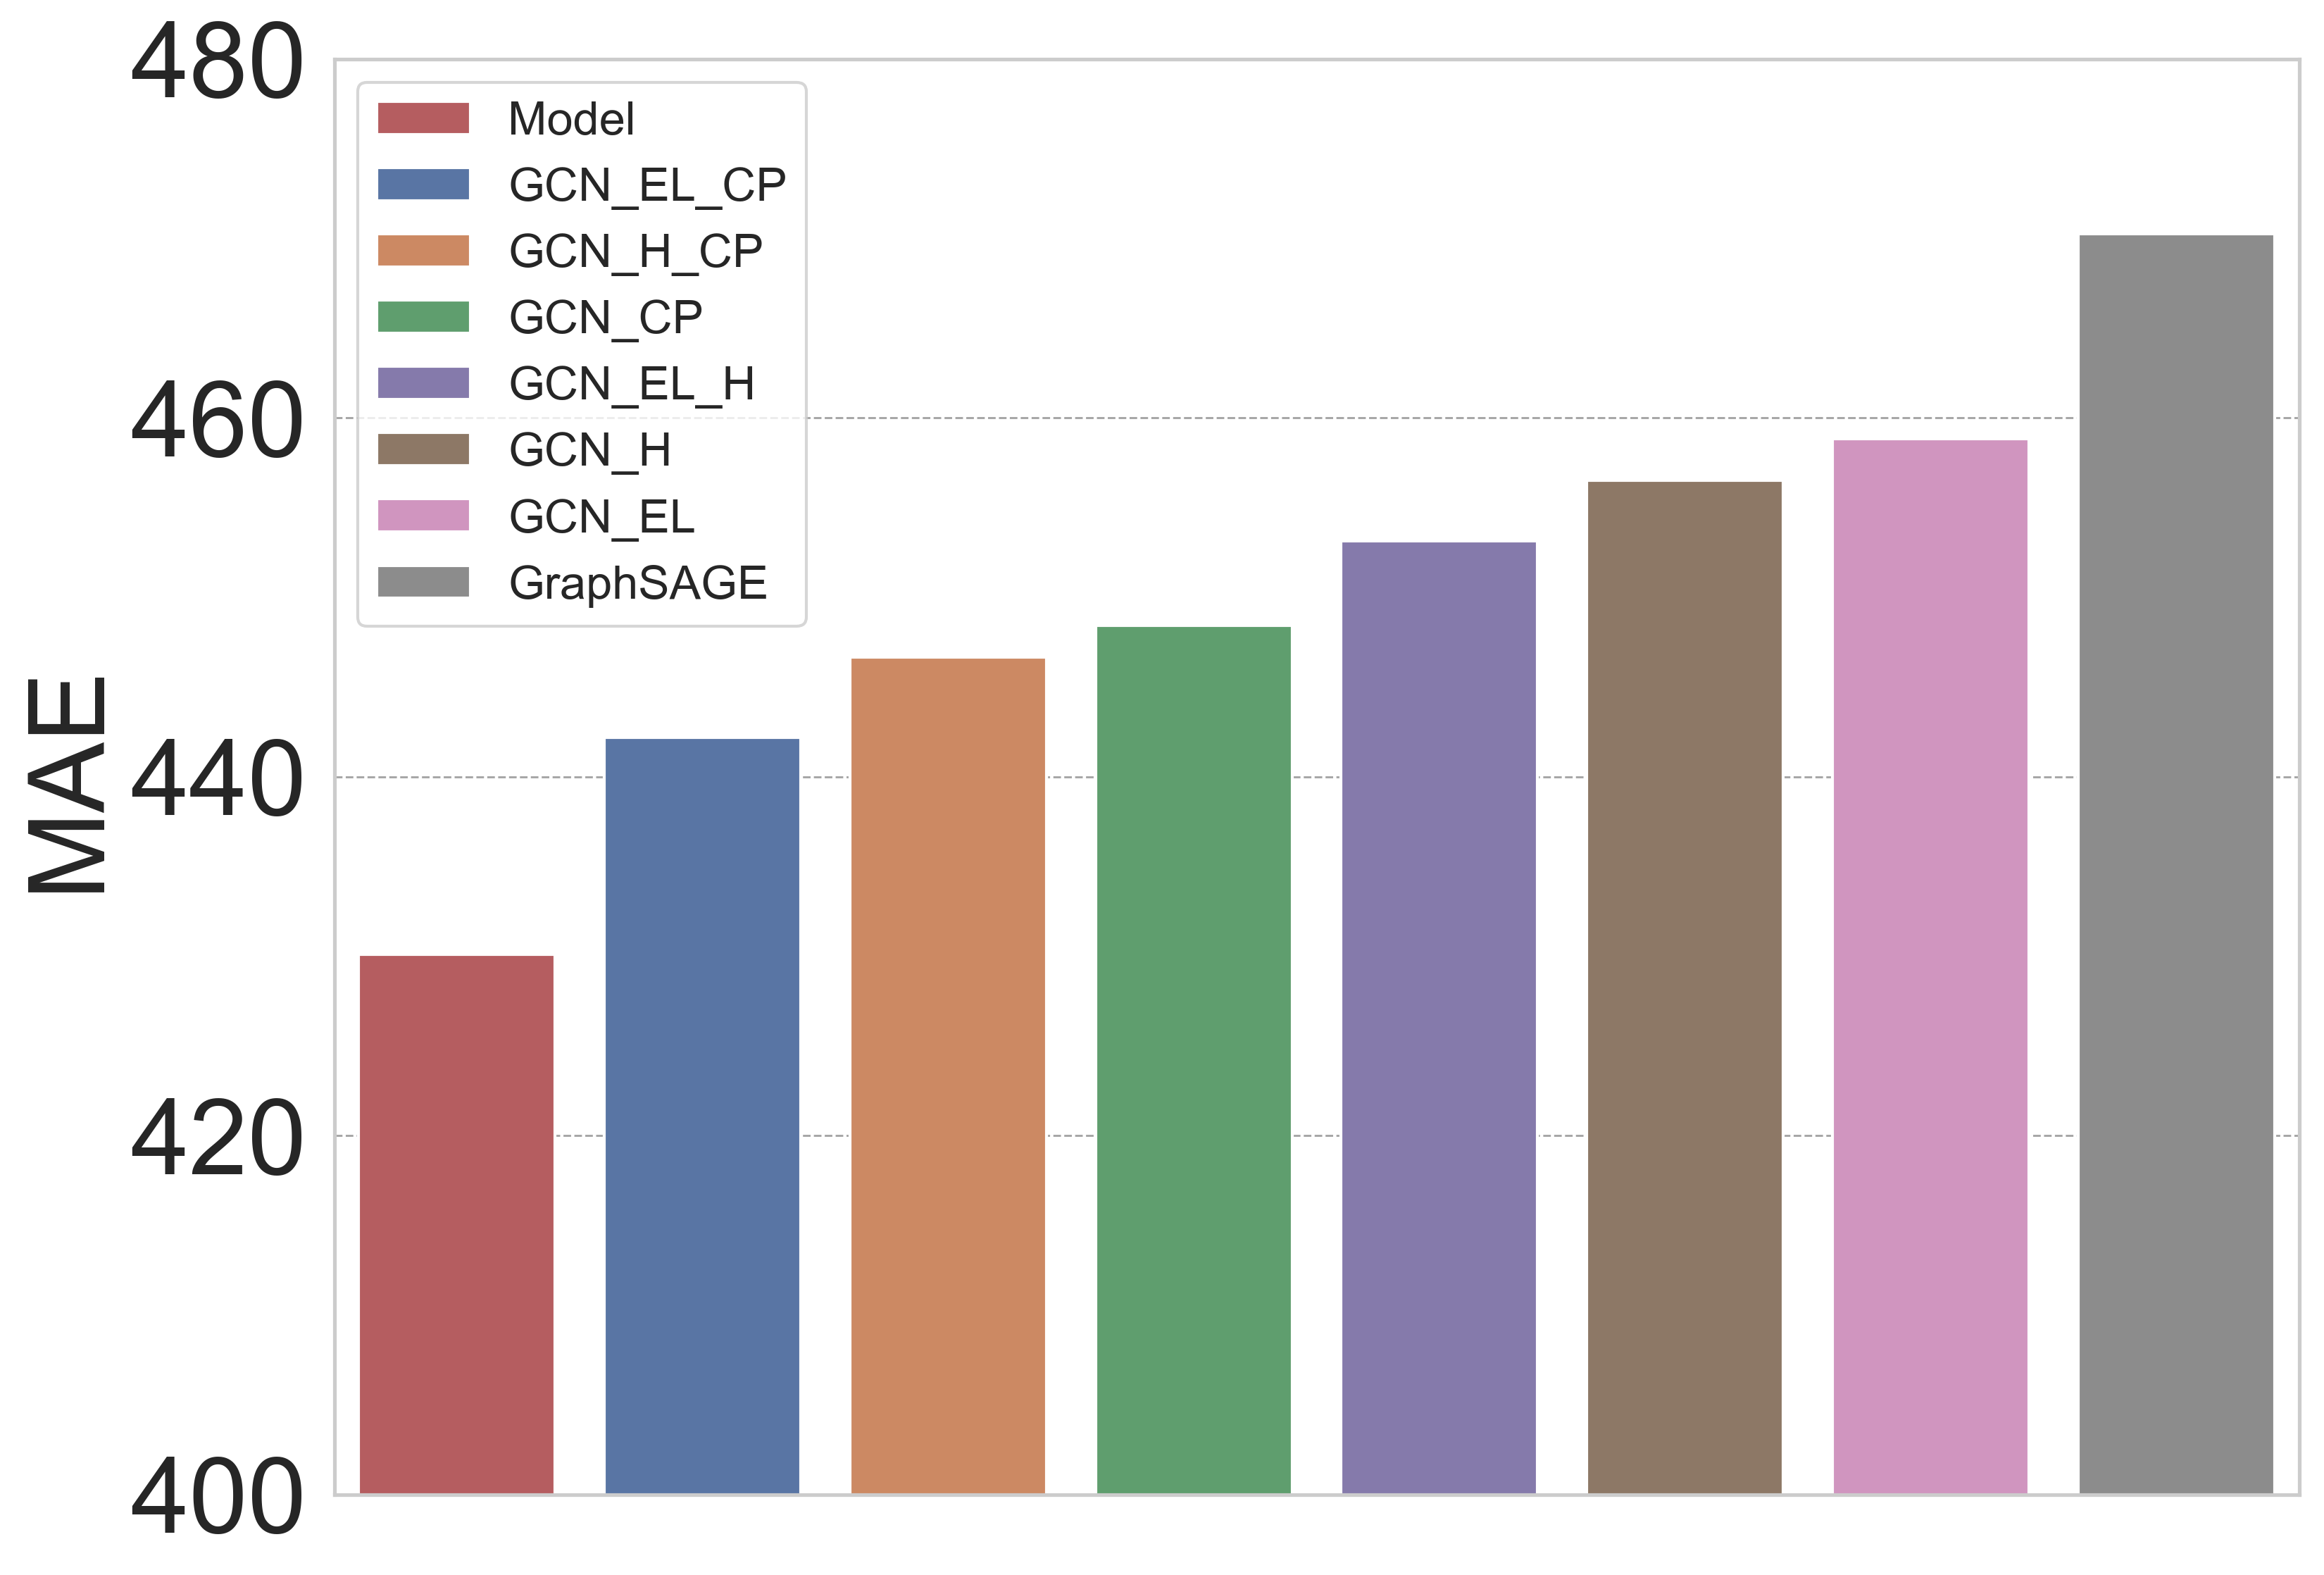

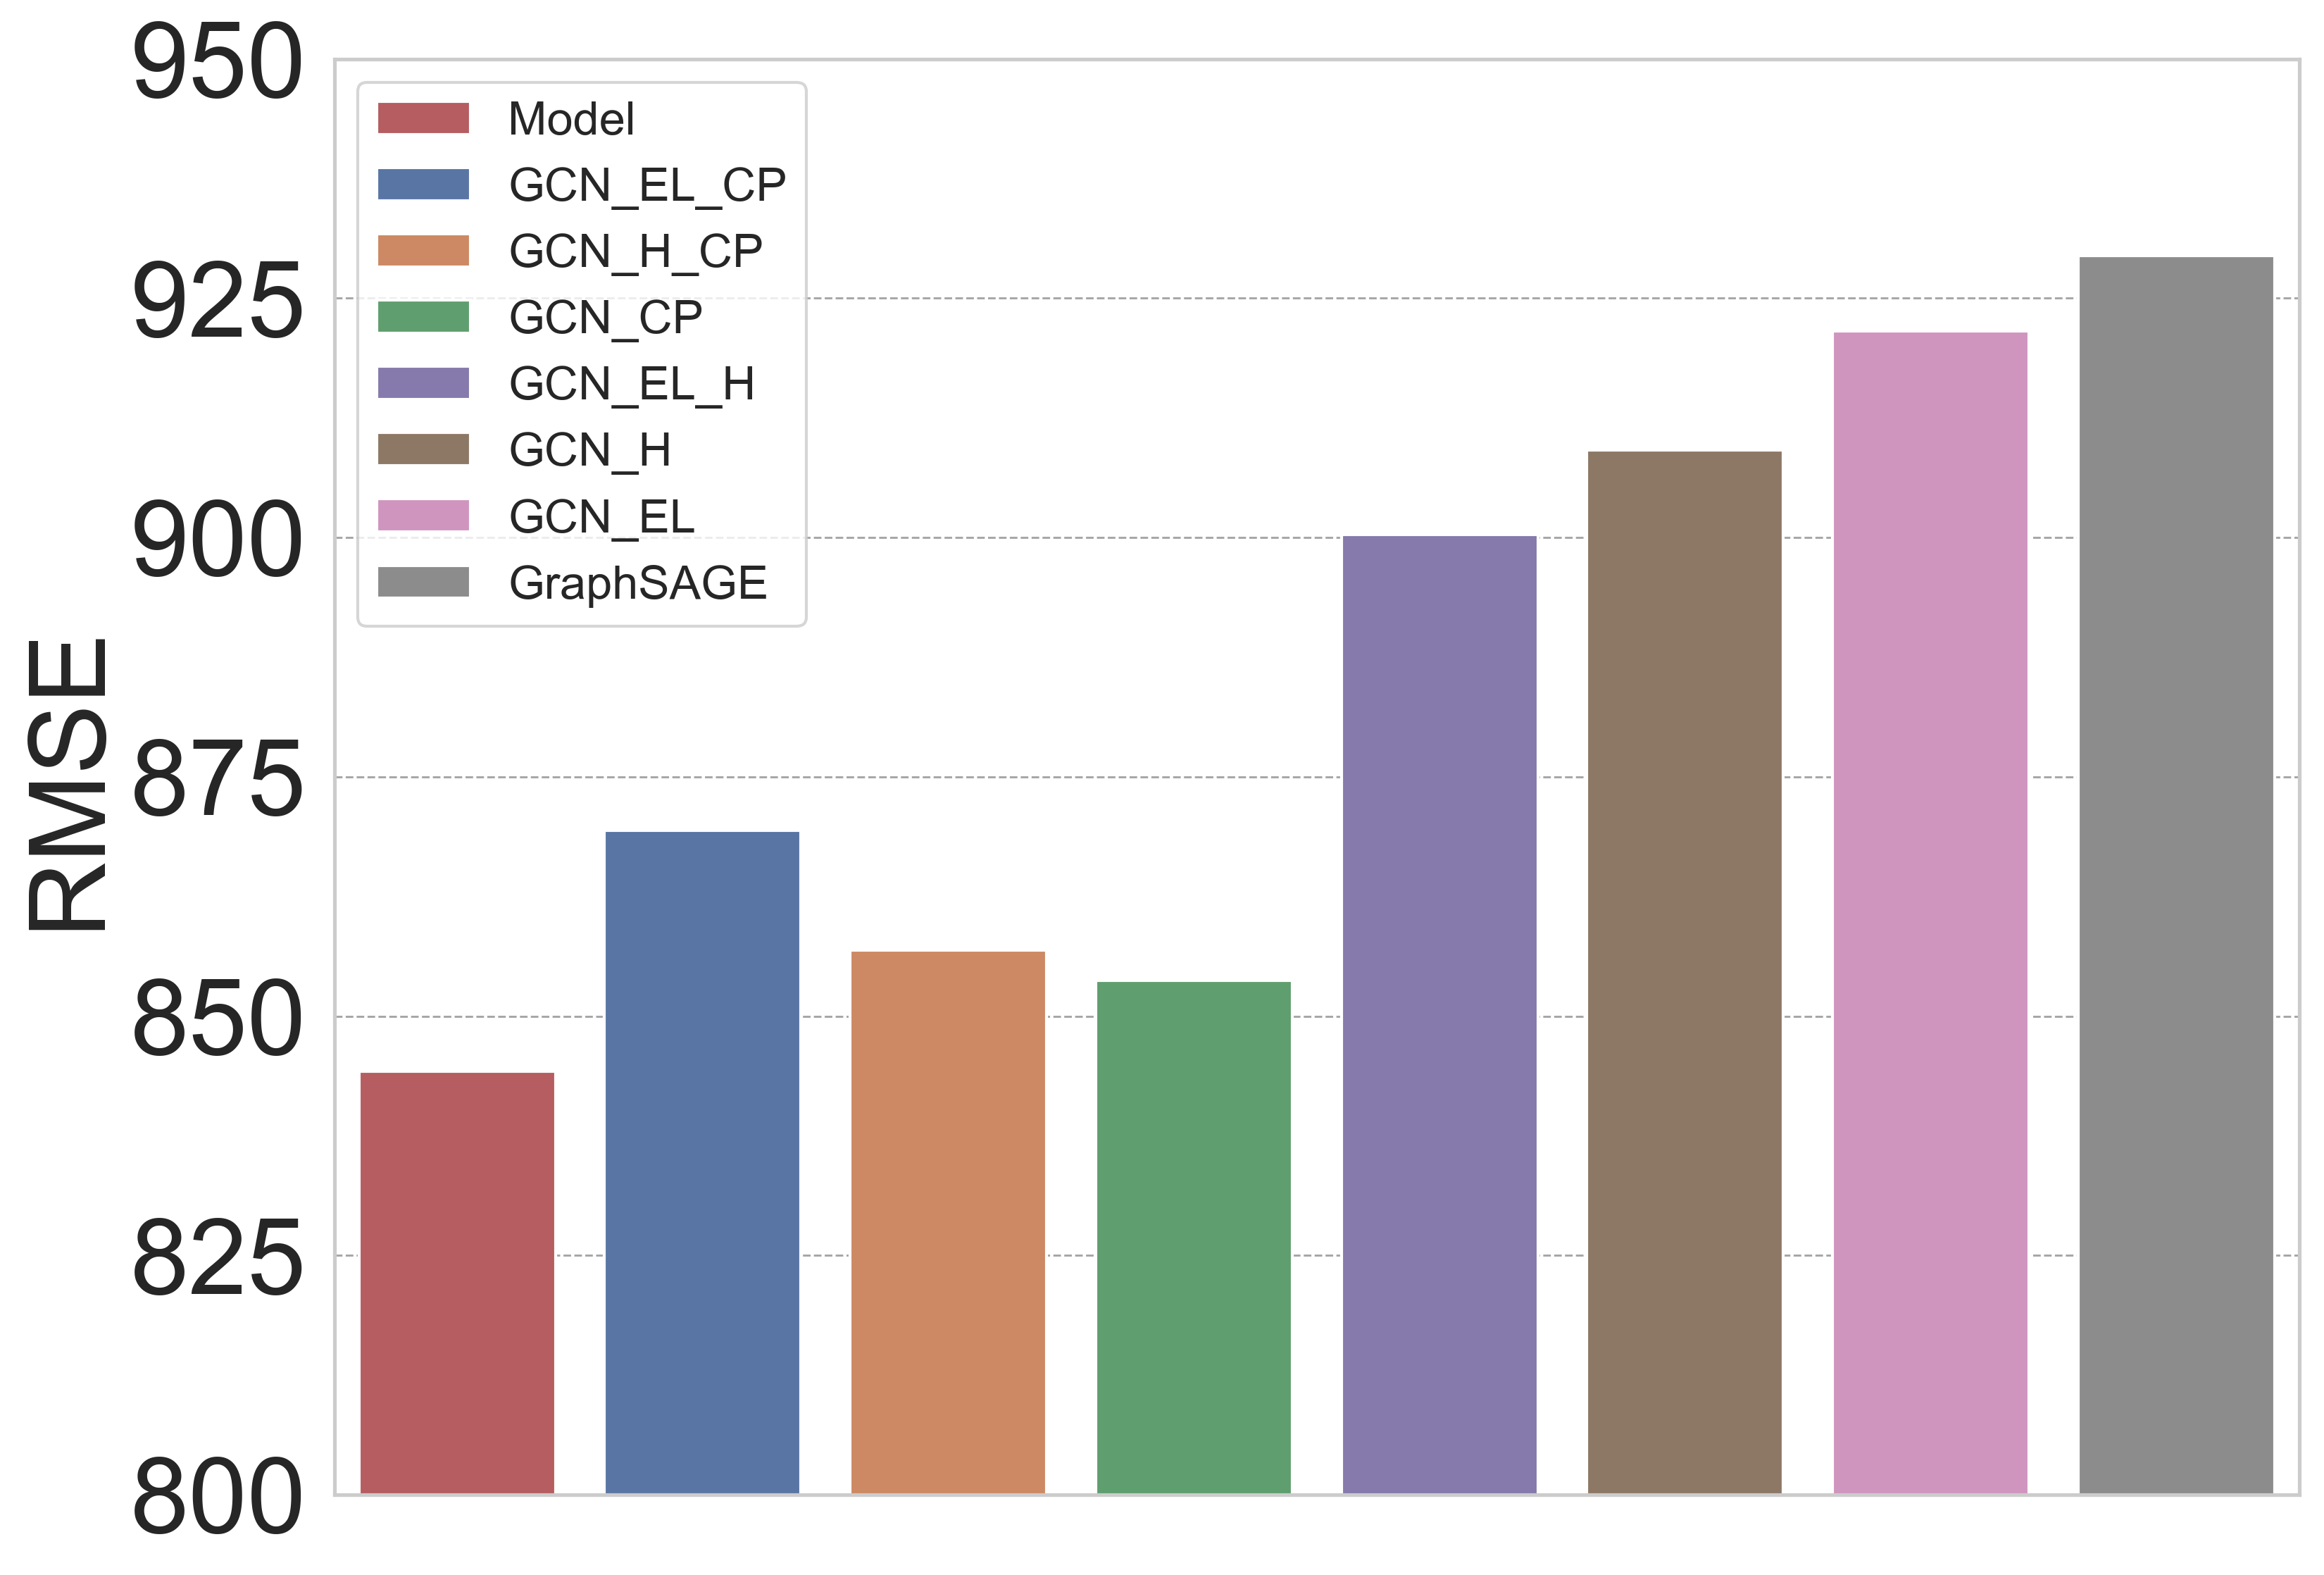

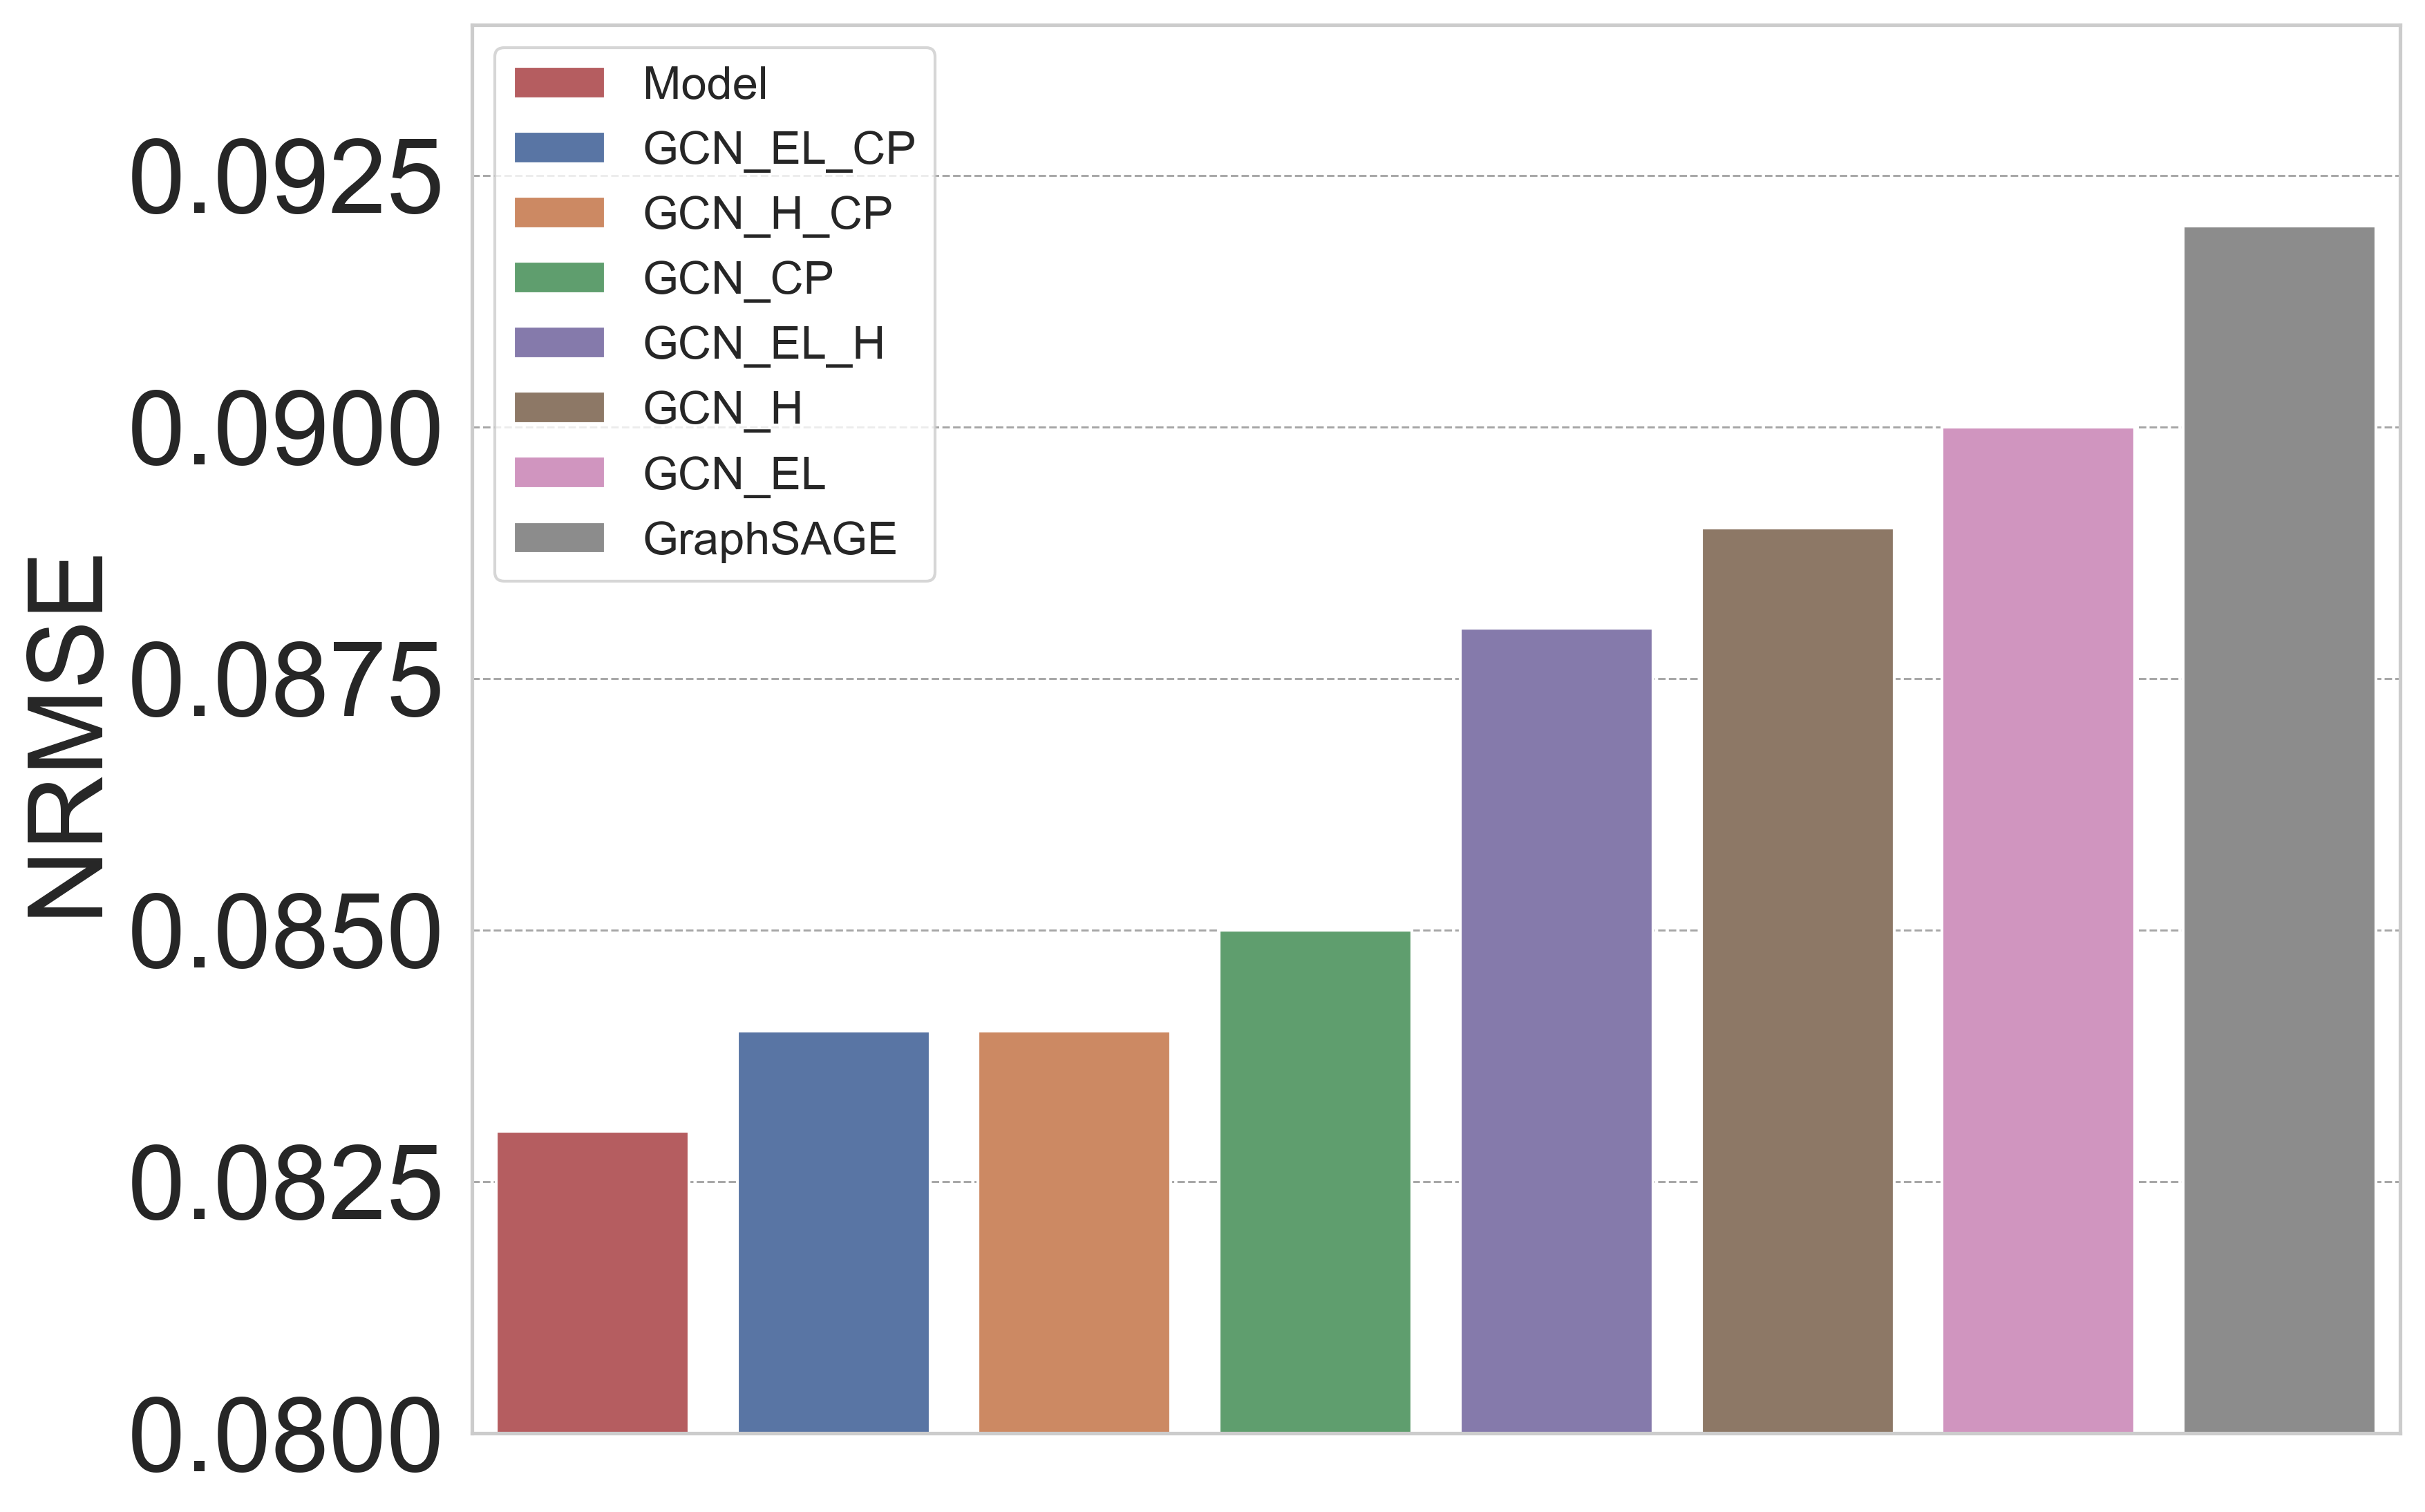

In [127]:
f, ax = plt.subplots(1,1,dpi=300,figsize=(12,9))
sns.barplot(x='x',y='mae',ax=ax,data=dilemma,palette=pp,hue='method',dodge=False)
ax.set_ylabel("MAE",fontdict=font)
ax.set_ylim(400, 480)
ax.set_xlabel('',fontsize=1)
ax.grid(color='grey', linestyle='--', linewidth=0.7,alpha=0.7) 
ax.patch.set_facecolor("white")
plt.tick_params(labelsize=36)
plt.xticks([])
plt.legend(loc='upper left',fontsize=16)
plt.savefig("/Users/yuanyuan/Documents/workplace/Community-Value-Prediction-Baseline/figure/mae.eps")
plt.show()


f, ax = plt.subplots(1,1,dpi=300,figsize=(12,9))
sns.barplot(x='x',y='rmse',ax=ax,data=dilemma,palette=pp,hue='method',dodge=False)
ax.set_ylabel("RMSE",fontdict=font)
ax.set_ylim(800,950)
ax.set_xlabel('')
ax.grid(color='grey', linestyle='--', linewidth=0.7,alpha=0.7) 
ax.patch.set_facecolor("white")
plt.tick_params(labelsize=36)
plt.xticks([])
plt.legend(loc='upper left',fontsize=16)
plt.savefig("/Users/yuanyuan/Documents/workplace/Community-Value-Prediction-Baseline/figure/rmse.eps")


f, ax = plt.subplots(1,1,dpi=300,figsize=(12,9))
values = [430.10,442.17,446.65,448.43,453.15,456.52,458.84,470.24]
sns.barplot(x='x',y='nrmse',ax=ax,data=dilemma,palette=pp,hue='method',dodge=False)
ax.set_ylabel("NRMSE",fontdict=font)
ax.set_ylim(0.080, 0.094)
ax.set_xlabel('')
ax.grid(color='grey', linestyle='--', linewidth=0.7,alpha=0.7) 
ax.patch.set_facecolor("white")
plt.tick_params(labelsize=36)
plt.xticks([])
plt.legend(loc='upper left',fontsize=16)
plt.savefig("/Users/yuanyuan/Documents/workplace/Community-Value-Prediction-Baseline/figure/nrmse.eps")

In [30]:
data_dict = {
    'value': [3.1271,3.1883,3.2061,3.2340,3.2567],
    'alpha': [1.0,2.0,4.0,8.0,16.0]
}
diversity = pd.DataFrame(data_dict)
data_dict = {
    'value': [0.0905,0.0944,0.0946,0.0939,0.0909],
    'alpha': [1.0,2.0,4.0,8.0,16.0]
}
accuracy = pd.DataFrame(data_dict)
data_neighbor = [diversity, accuracy]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


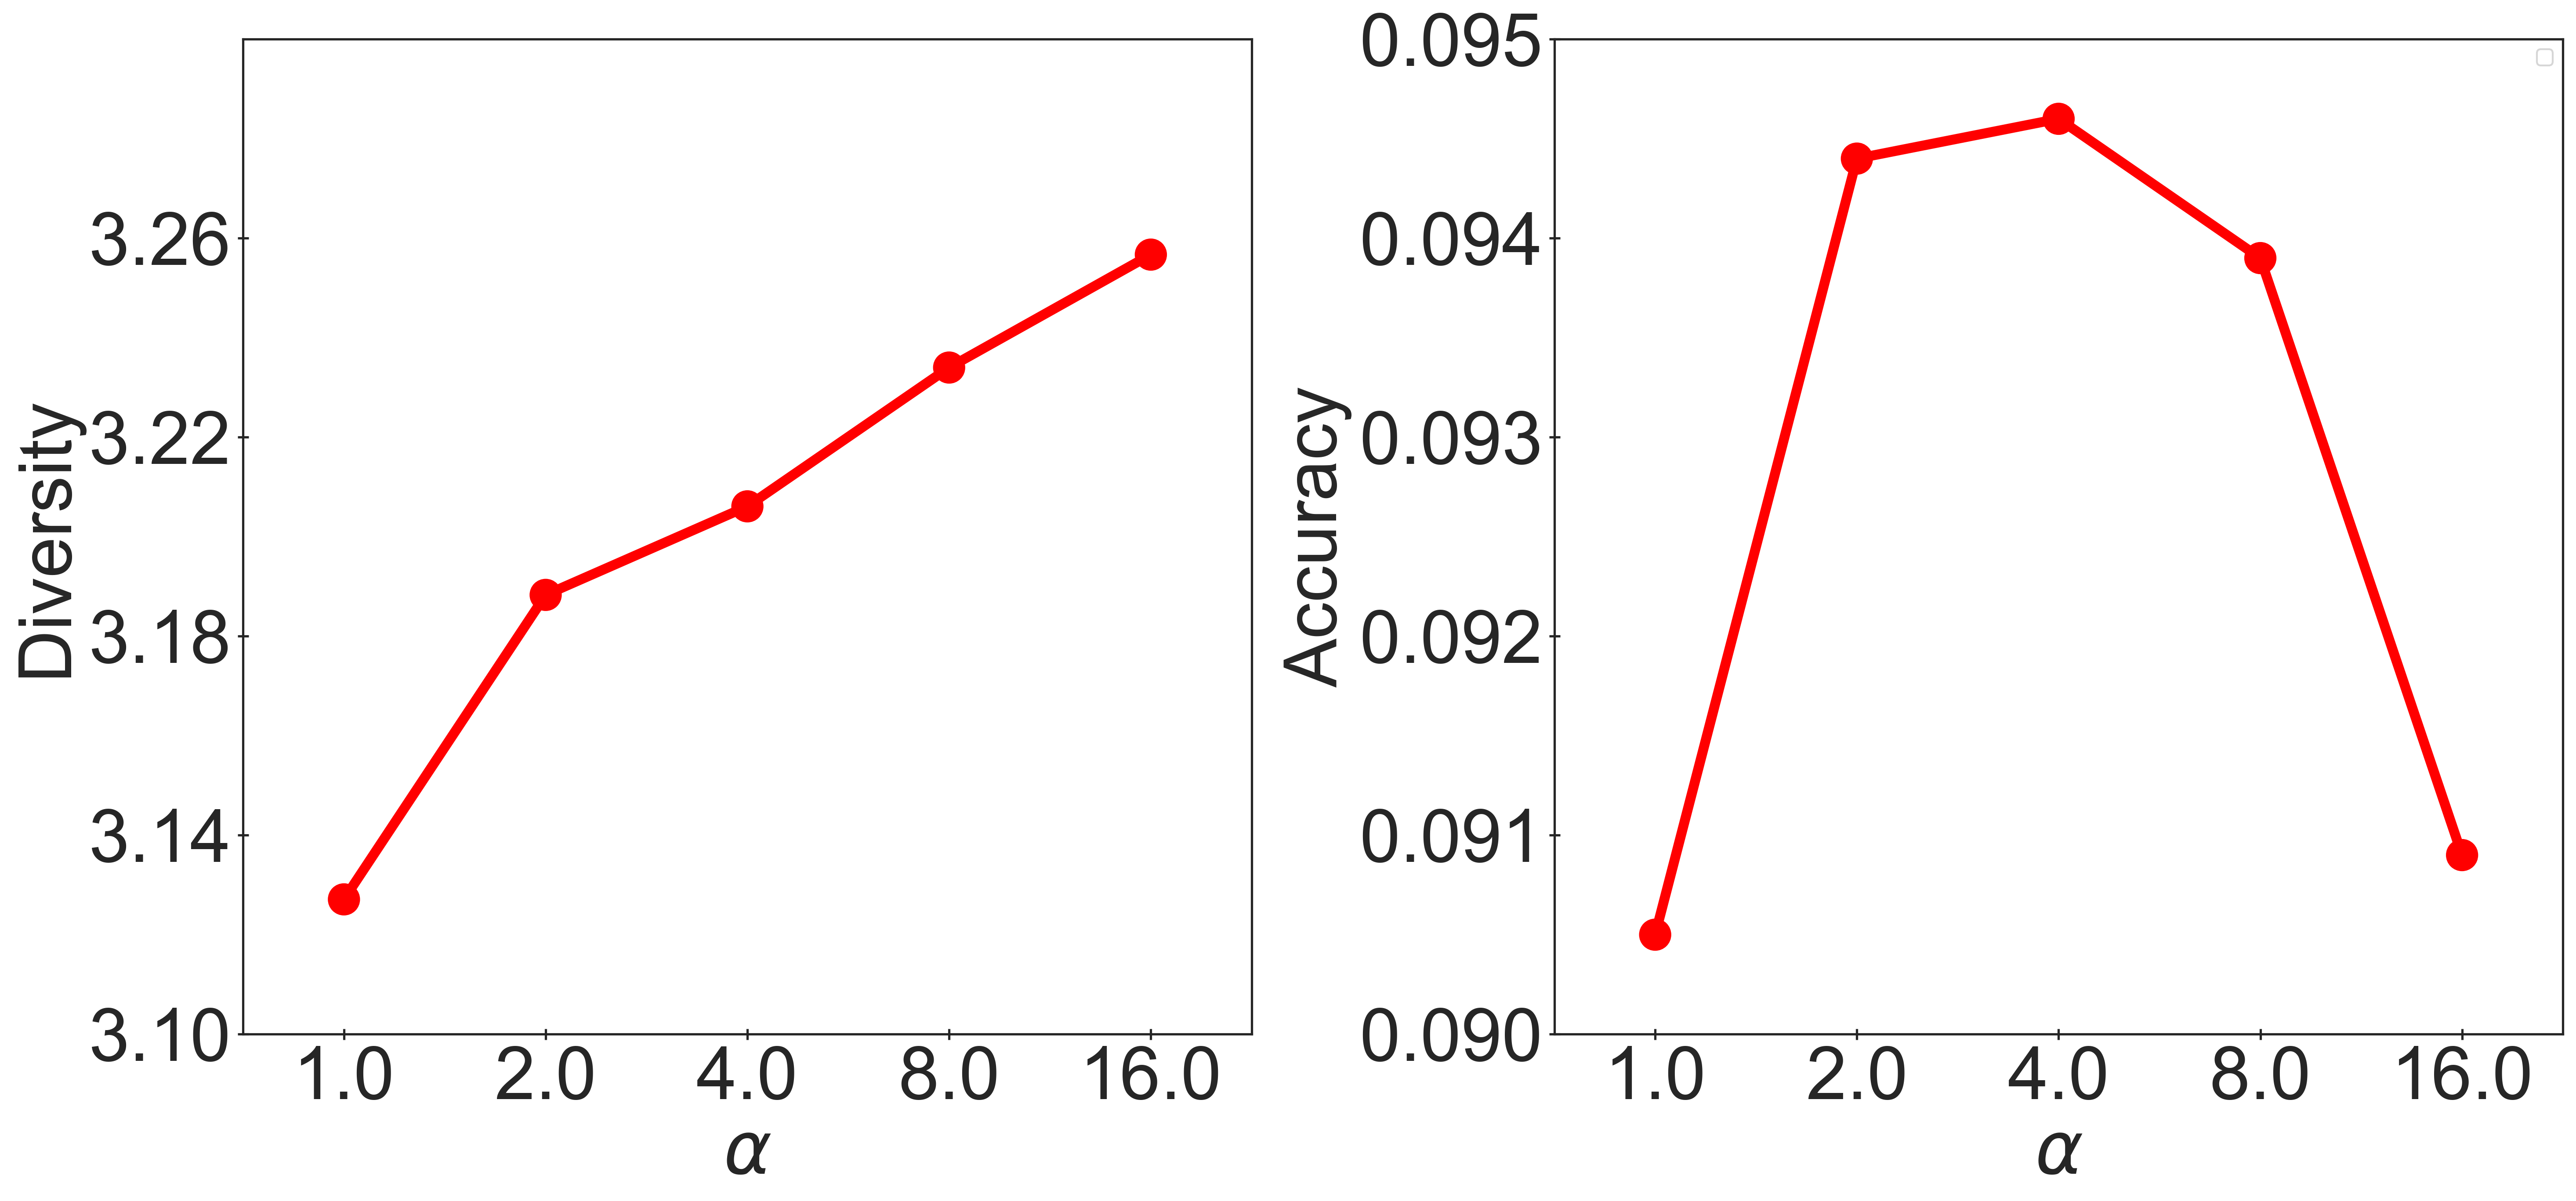

In [32]:
f, ax = plt.subplots(1,2,dpi=300,figsize=(20,10))
for i in range(2):
    sns.pointplot(data=data_neighbor[i], x='alpha', y='value', ax=ax[i], 
                  markers='o', linestyles='-', scale=2, color='red')
    #plt.setp(ax[i].lines, linewidth=5)
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    if i == 0:
        #ax[i].legend(bbox_to_anchor=[0.2, 1, 1.8, 0.1], loc="upper center",
                     #mode="expand", ncol=6,borderaxespad=0., fontsize=35)
        #plt.xticks(fontsize='large')
        ax[i].set_ylabel("Diversity",fontsize=40)
        ax[i].set_yticks([3.1, 3.14, 3.18, 3.22, 3.26])
        ax[i].set_ylim(3.1, 3.3)
        ax[i].set_xlabel(r'$\alpha$',fontsize=40)
        ax[i].tick_params(labelsize=40, direction='inout')
    elif i == 1:
        ax[i].legend([])
        #plt.xticks(fontsize='large')
        #ax[i].set_ylabel("NDCG@50",fontsize='x-large')
        #ax[i].set_yticks([0.005, 0.010,0.015,0.020,0.025])
        ax[i].set_ylabel("Accuracy",fontsize=40)
        ax[i].set_yticks([0.09,0.091,0.092,0.093,0.094,0.095])
        ax[i].set_ylim(0.09, 0.095)
        ax[i].set_xlabel(r'$\alpha$',fontsize=40)
        ax[i].tick_params(labelsize=40, direction='inout')
plt.subplots_adjust(left=0.1, bottom=None, right=0.98, top=None,wspace=0.3, hspace=None)
plt.savefig("/Users/zhengyu/Seafile/私人资料库/WWW2020/fig/neighbor_sampling.eps")
plt.show()

In [63]:
data_dict = {
    'method': ['Random', 'MF', 'NGCF', 'MMR', 'DUM', r'PMF+$\alpha$+$\beta$', 'DDP'],
    'accuracy': [0.002,0.0899,0.0949,0.0544,0.0495,0.0473,0.0633],
    'diversity': [4.7021,3.4356,3.36,3.4931,4.1051,4.3725,3.3904]
}
dilemma = pd.DataFrame(data_dict)

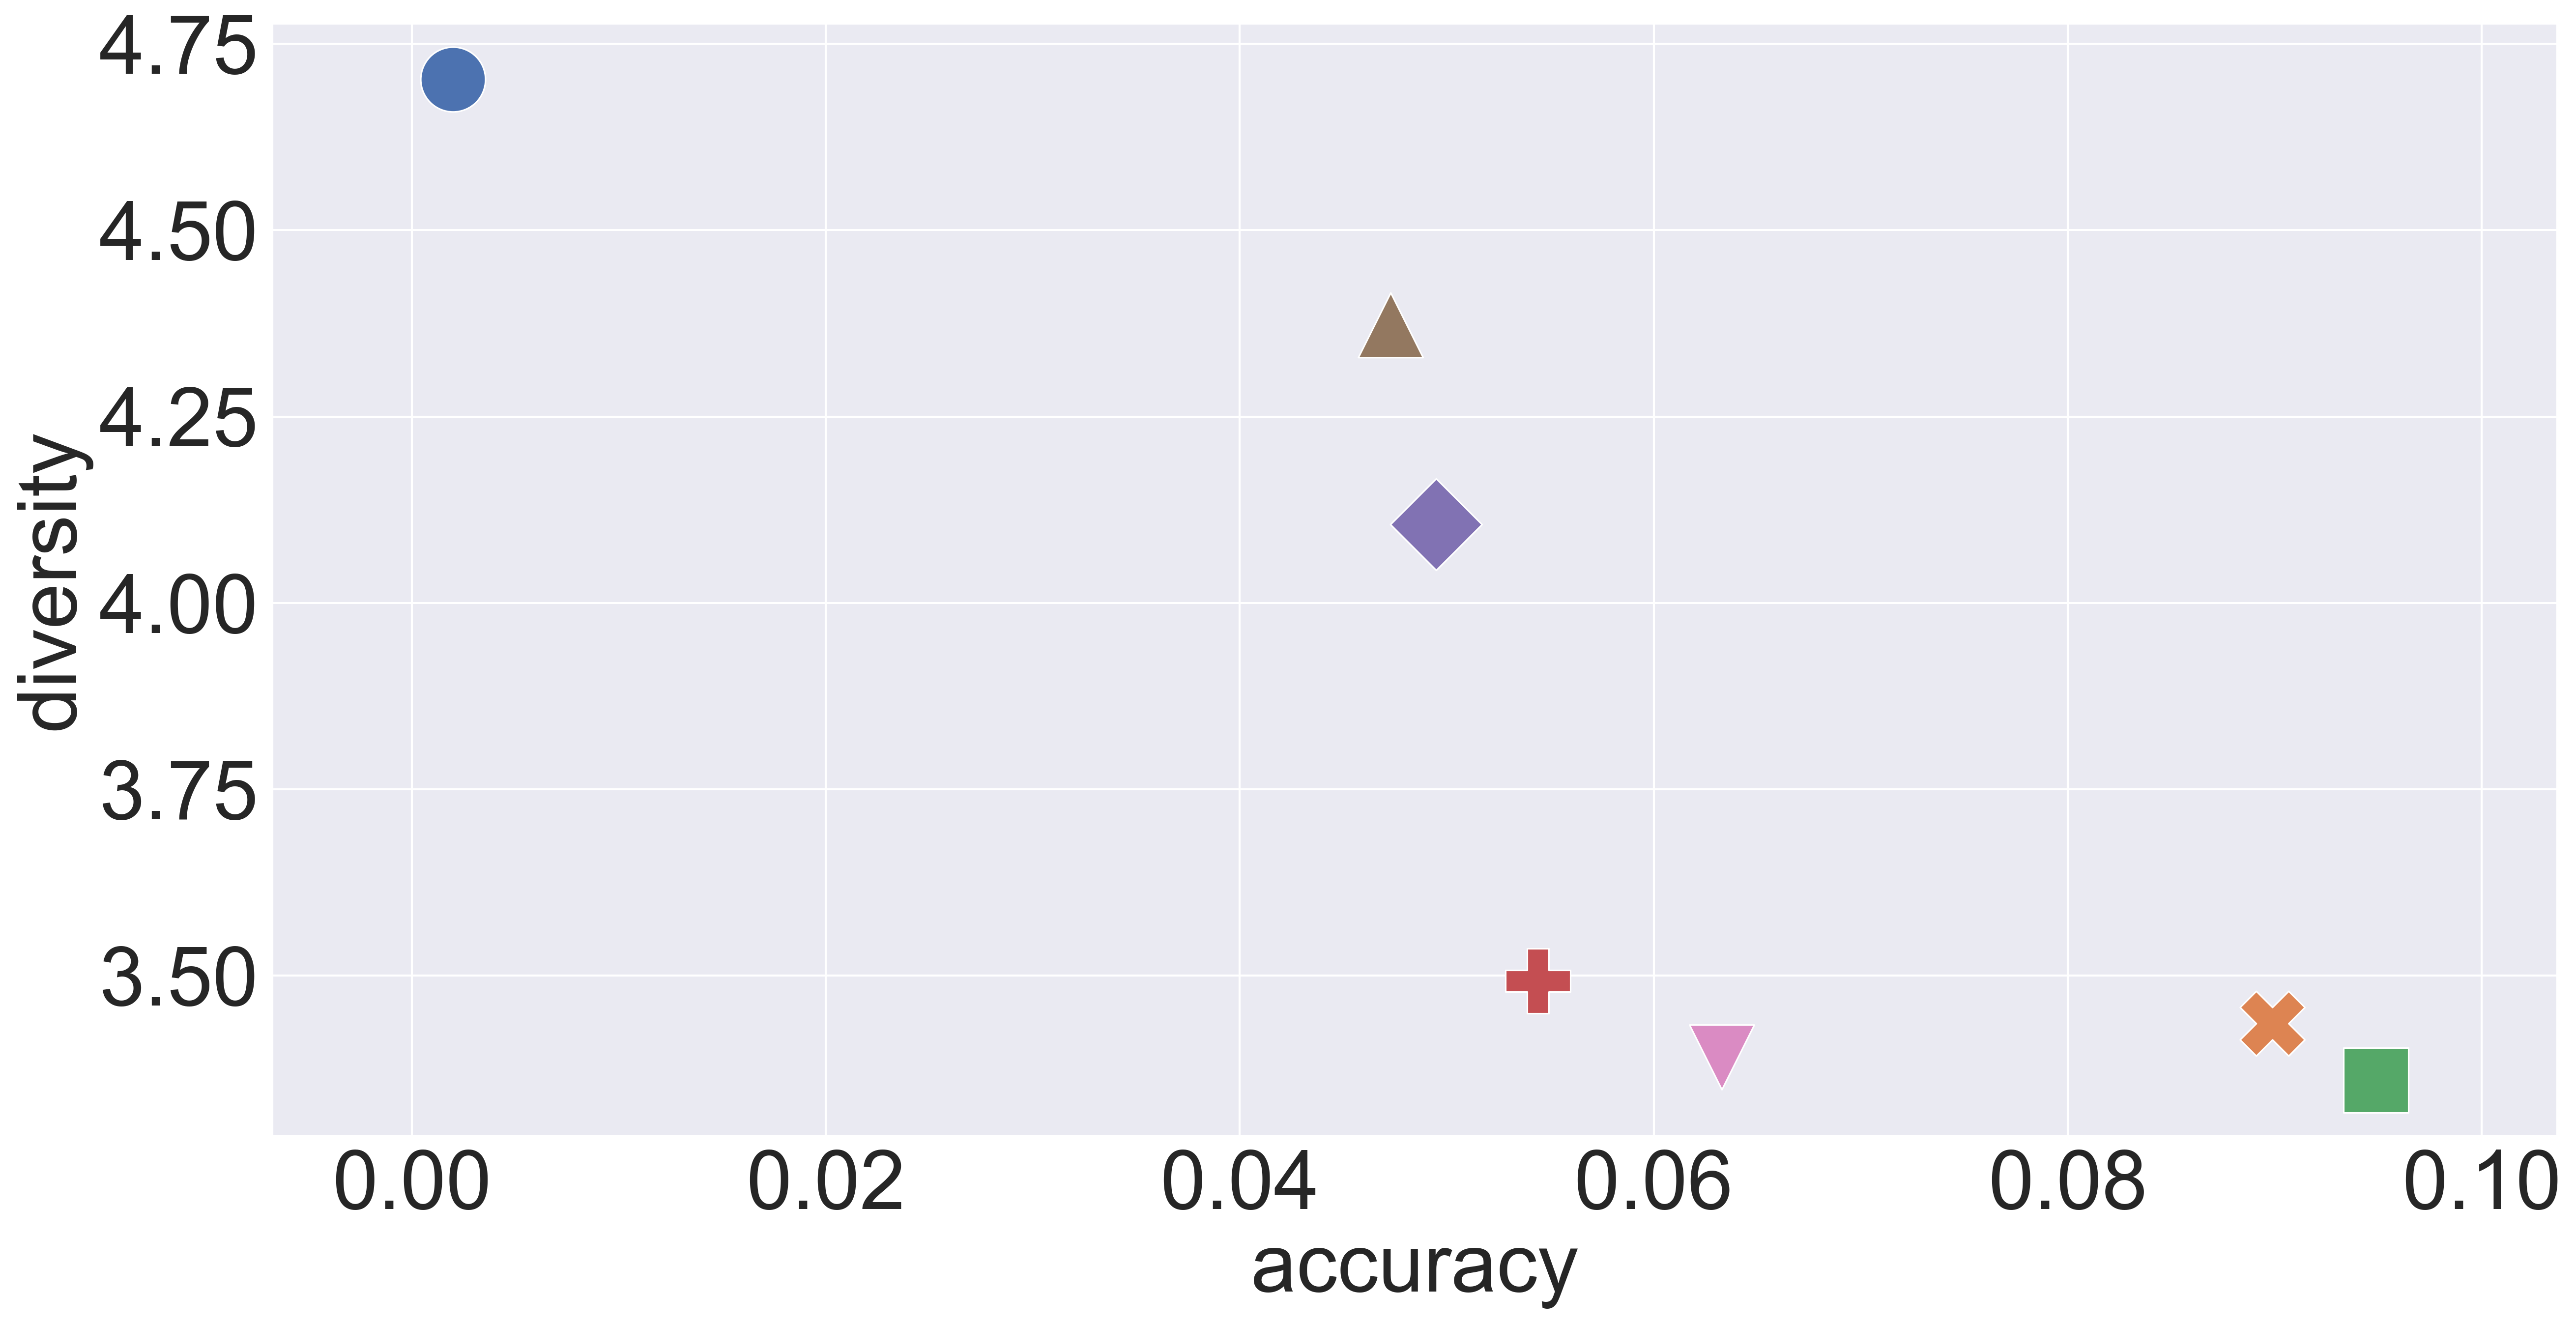

In [38]:
f, ax = plt.subplots(1,1,dpi=300,figsize=(20,10))
sns.scatterplot(x="accuracy", y="diversity",hue="method", style="method", data=dilemma, ax=ax, s=1000, legend=False)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
ax.tick_params(labelsize=40, direction='inout')
ax.set_xlabel('accuracy', fontsize=40)
ax.set_ylabel('diversity', fontsize=40)
#plt.legend(fontsize=35, title_fontsize=100)
#plt.savefig("/Users/zhengyu/Seafile/私人资料库/WWW2020/fig/dilemma.eps")
plt.show()


In [39]:
current_palette = sns.color_palette()
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [28]:
data_dict = {
    'value': [64.8363,65.6371,70.1719,76.7391,82.5211],
    'beta': [0.01,0.02,0.04,0.08,0.16]
}
diversity = pd.DataFrame(data_dict)
data_dict = {
    'value': [0.0973,0.0954,0.0985,0.0954,0.0844],
    'beta': [0.01,0.02,0.04,0.08,0.16]
}
accuracy = pd.DataFrame(data_dict)
data_neighbor = [diversity, accuracy]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


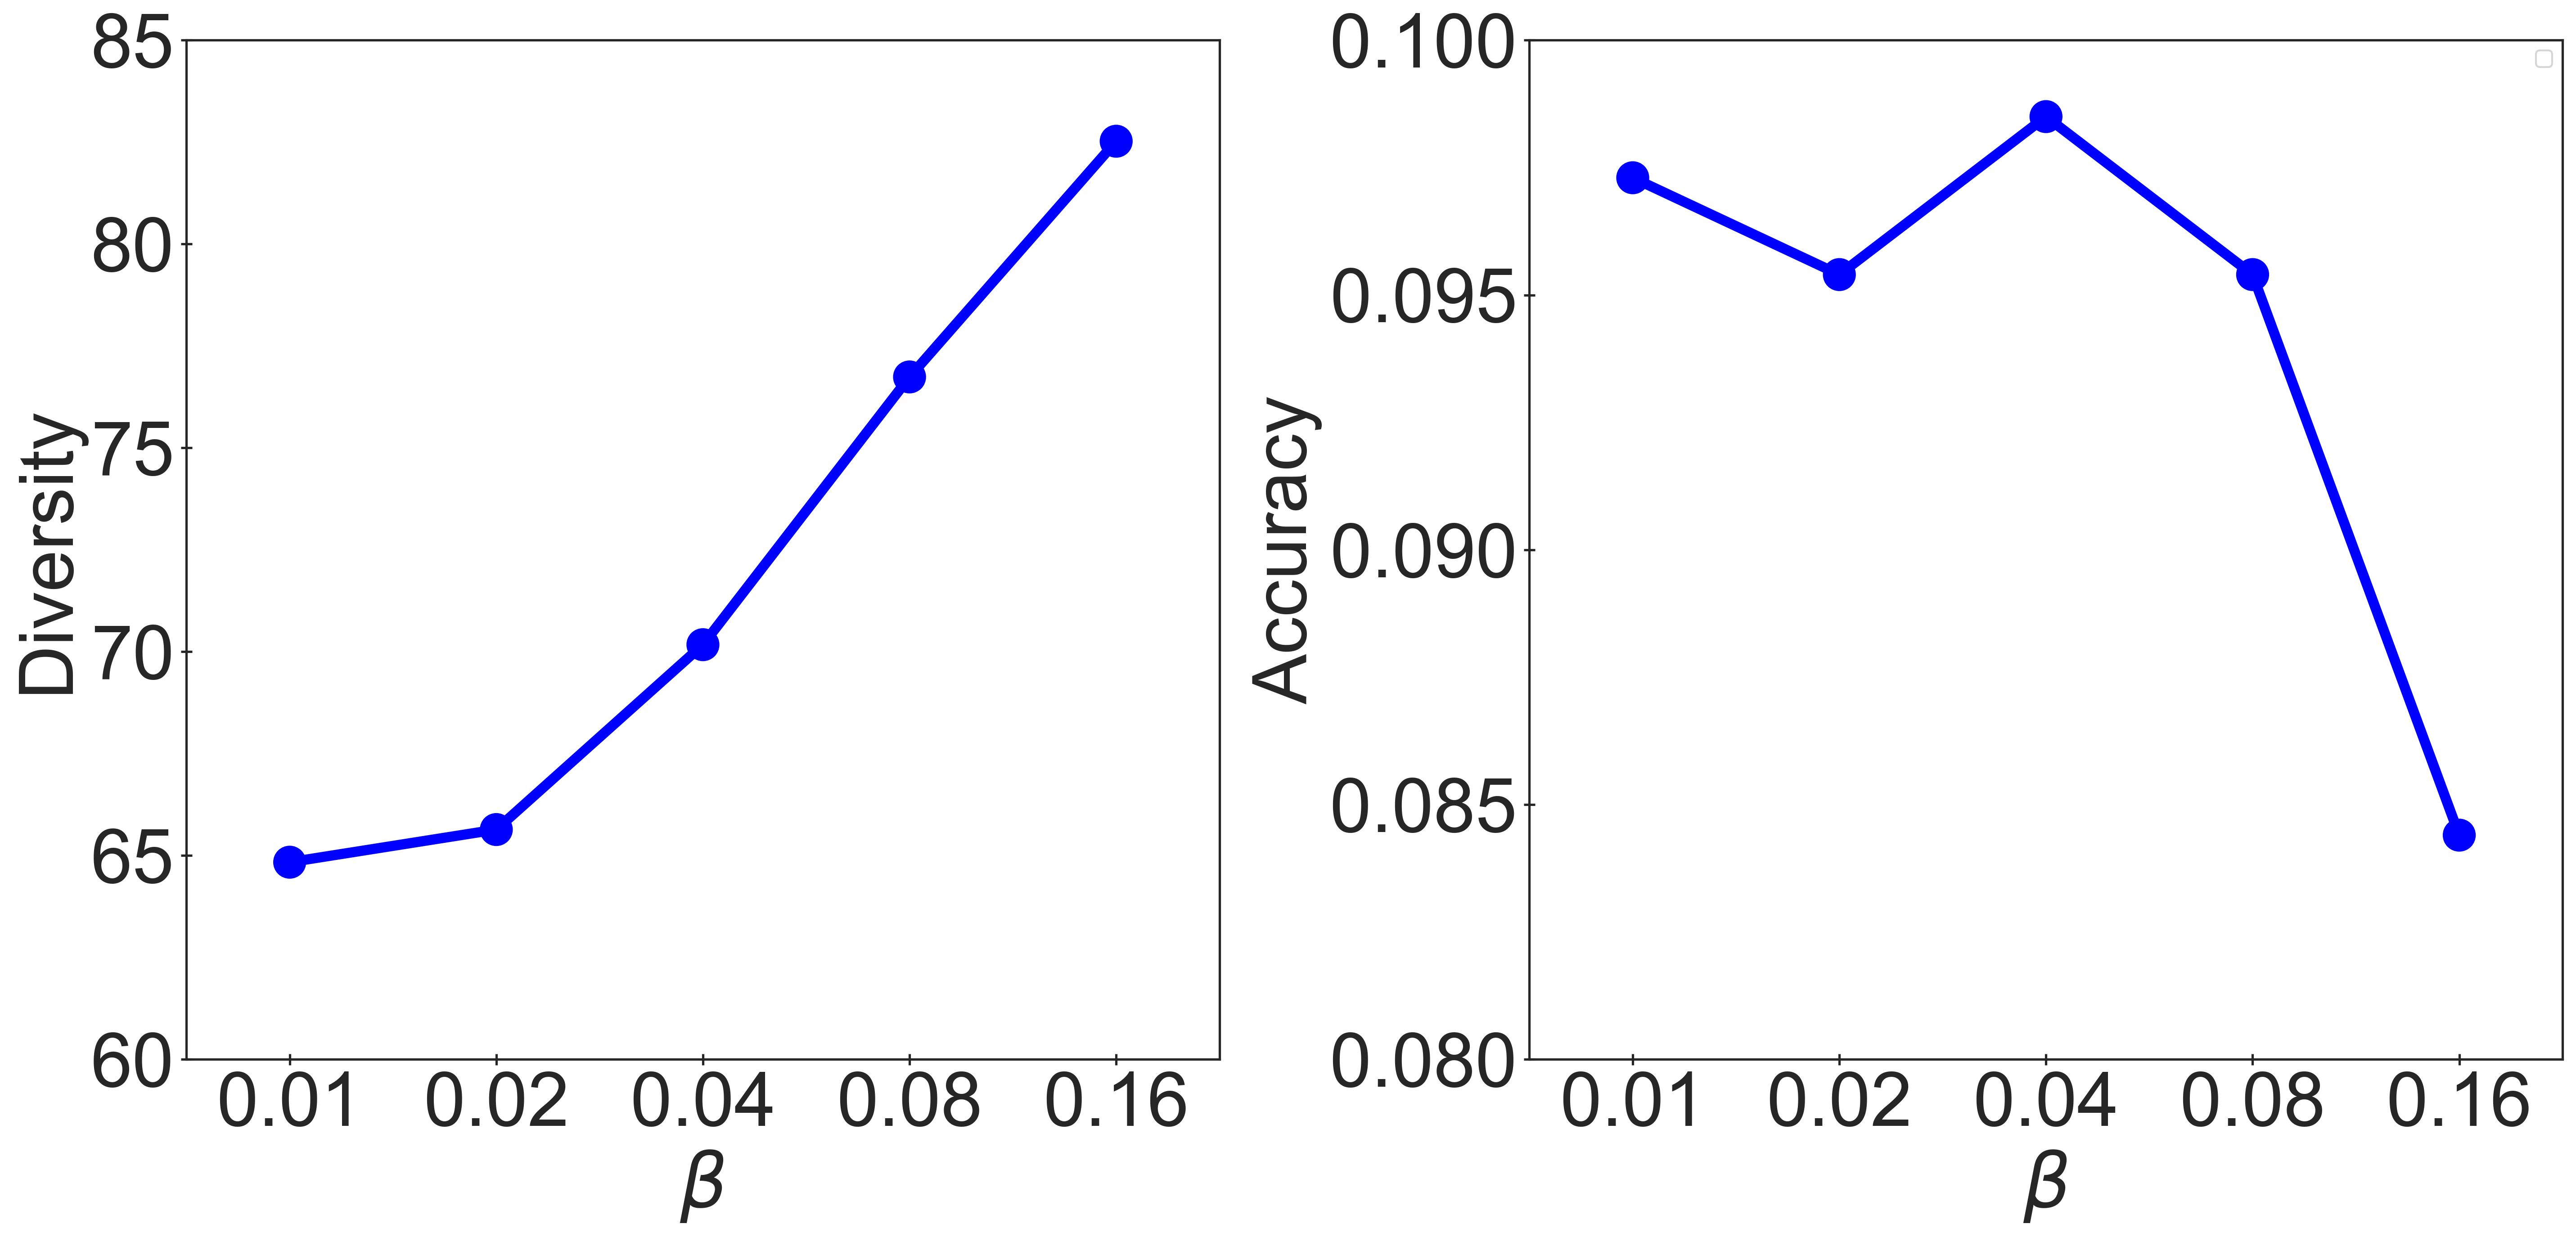

In [29]:
f, ax = plt.subplots(1,2,dpi=300,figsize=(20,10))
for i in range(2):
    sns.pointplot(data=data_neighbor[i], x='beta', y='value', ax=ax[i], 
                  markers='o', linestyles='-', scale=2, color='blue')
    #plt.setp(ax[i].lines, linewidth=5)
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    if i == 0:
        #ax[i].legend(bbox_to_anchor=[0.2, 1, 1.8, 0.1], loc="upper center",
                     #mode="expand", ncol=6,borderaxespad=0., fontsize=35)
        #plt.xticks(fontsize='large')
        ax[i].set_ylabel("Diversity",fontsize=40)
        ax[i].set_yticks([60, 65, 70, 75, 80, 85])
        ax[i].set_ylim(60, 85)
        ax[i].set_xlabel(r'$\beta$',fontsize=40)
        ax[i].tick_params(labelsize=40, direction='inout')
    elif i == 1:
        ax[i].legend([])
        #plt.xticks(fontsize='large')
        #ax[i].set_ylabel("NDCG@50",fontsize='x-large')
        #ax[i].set_yticks([0.005, 0.010,0.015,0.020,0.025])
        ax[i].set_ylabel("Accuracy",fontsize=40)
        ax[i].set_yticks([0.08,0.085,0.09,0.095,0.1])
        ax[i].set_ylim(0.08, 0.1)
        ax[i].set_xlabel(r'$\beta$',fontsize=40)
        ax[i].tick_params(labelsize=40, direction='inout')
plt.subplots_adjust(left=0.1, bottom=None, right=0.98, top=None,wspace=0.3, hspace=None)
plt.savefig("/Users/zhengyu/Seafile/私人资料库/WWW2020/fig/negative_sampling.eps")
plt.show()

In [61]:
data_dict = {
    'diversity': [3.1271,3.1883,3.2061,3.2340,3.2567],
    'accuracy': [0.0905,0.0944,0.0946,0.0939,0.0909],
    'alpha': [1,2,4,8,16],
    'event': [1,1,1,1,1]
}
neighbor = pd.DataFrame(data_dict)

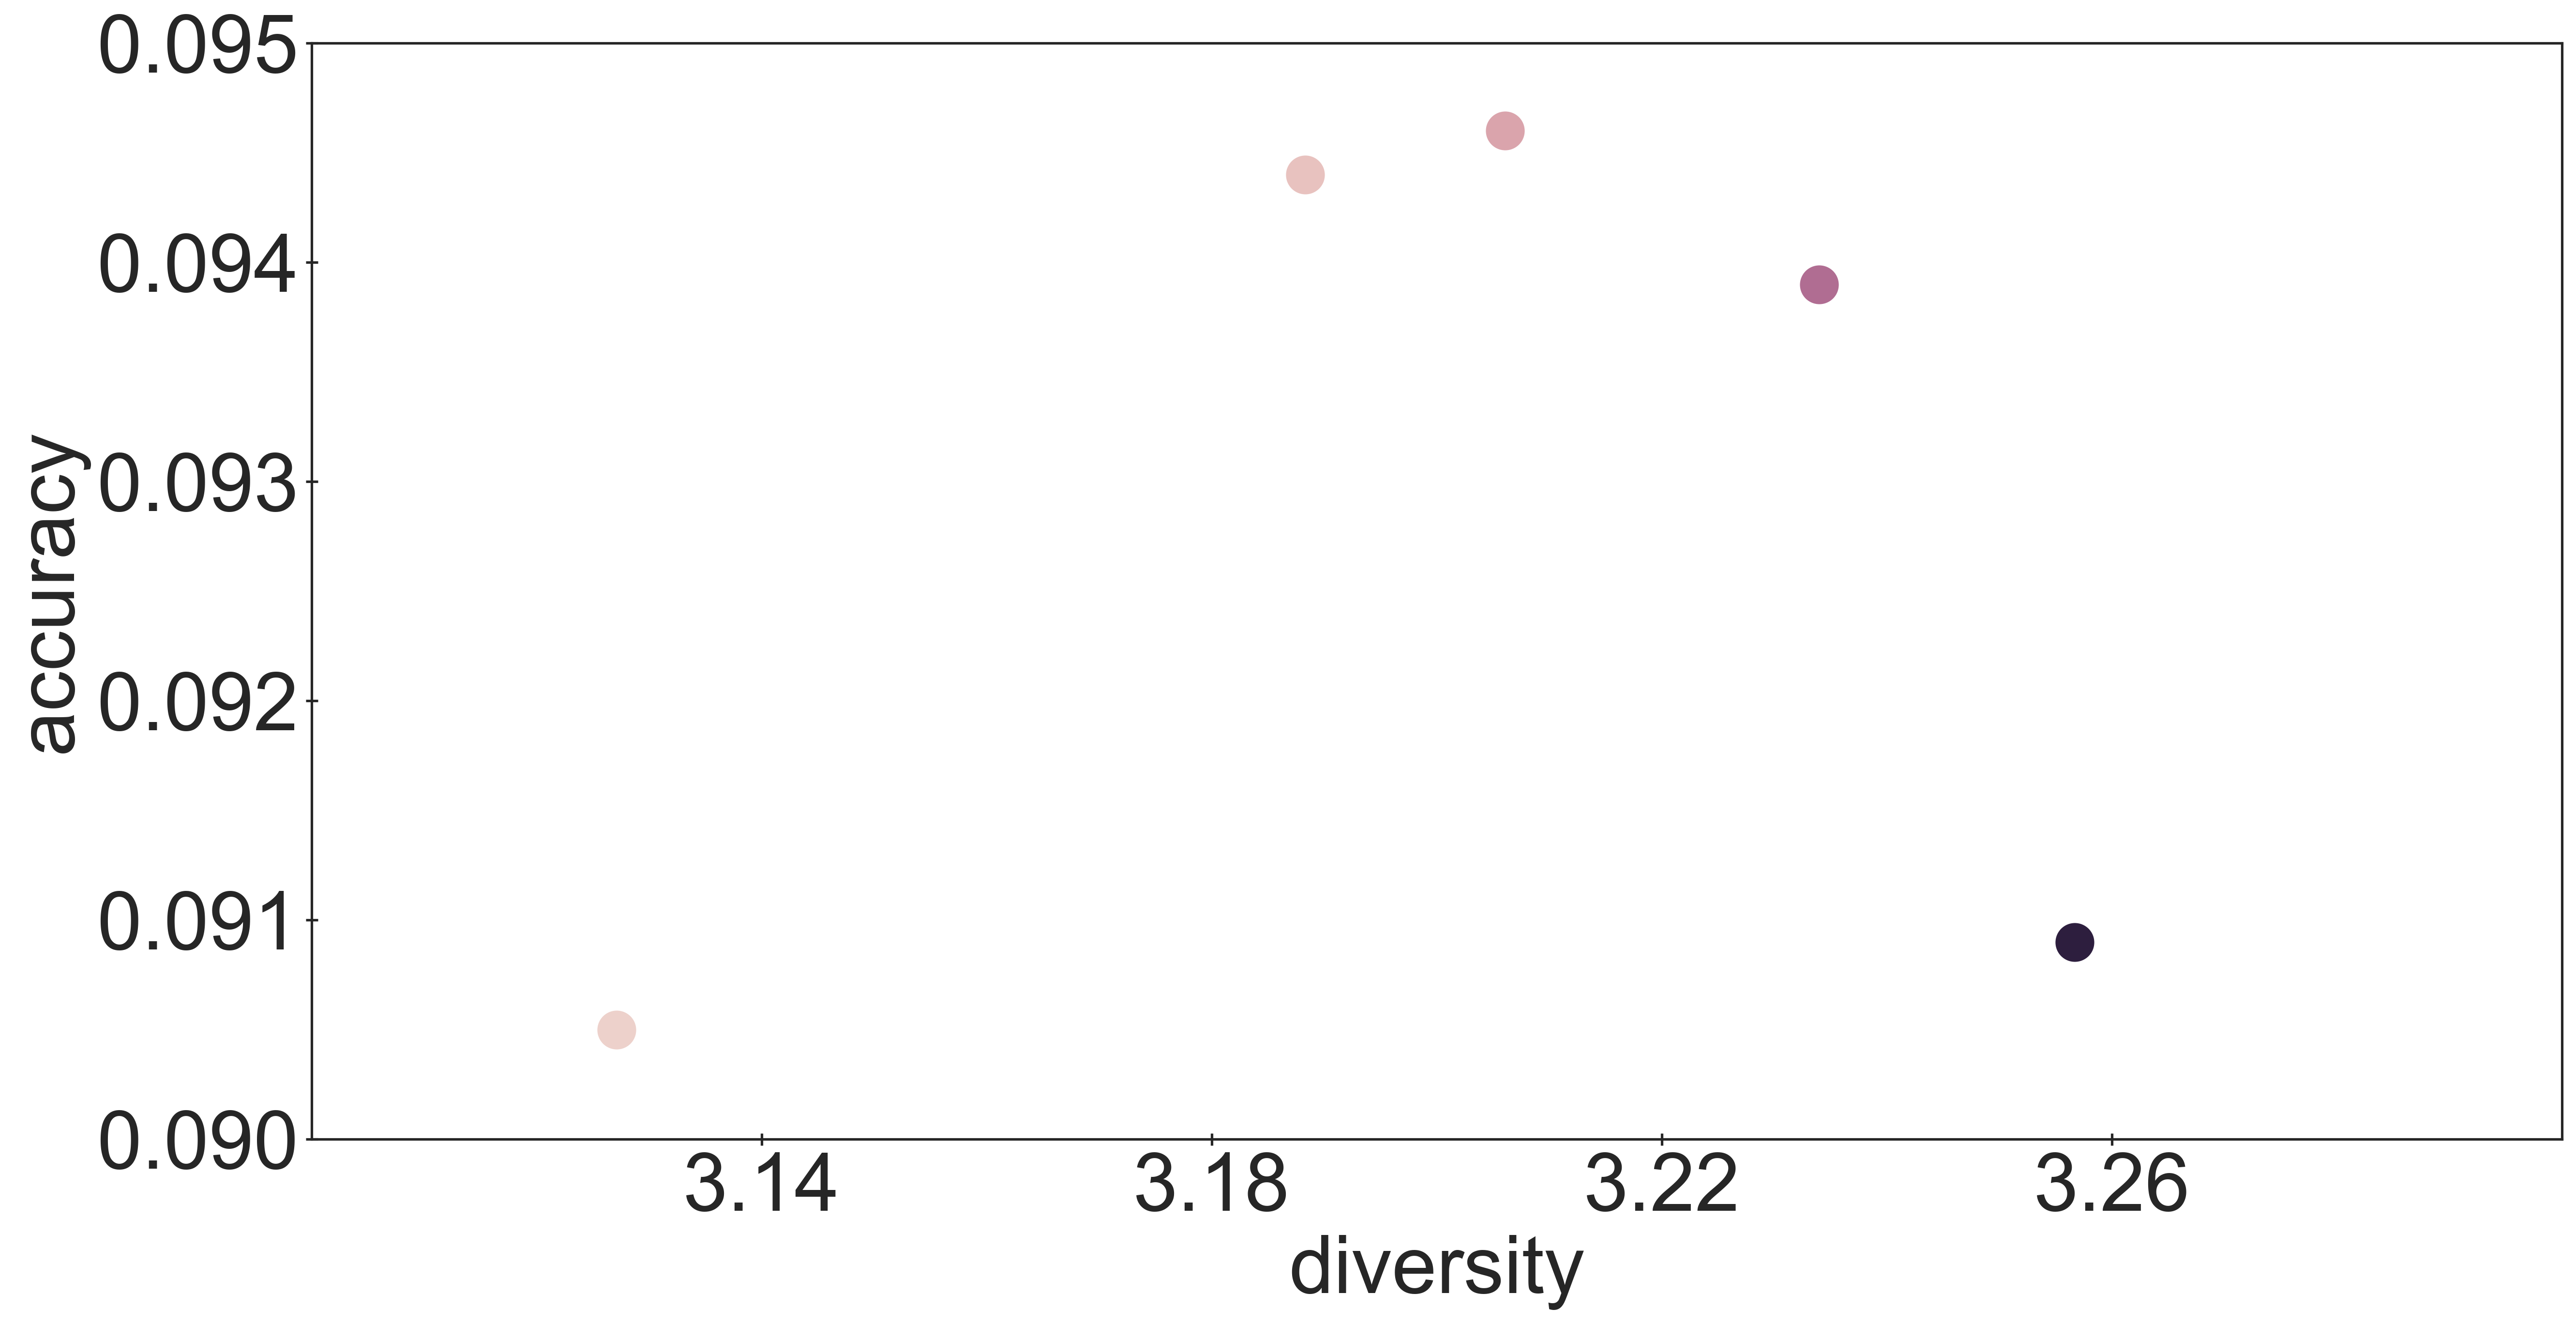

In [74]:
f, ax = plt.subplots(1,1,dpi=300,figsize=(20,10))
sns.lineplot(data=neighbor, x='diversity', y='accuracy', hue='alpha', style='event', markers=True, dashes=False, 
             ax=ax, color='red', lw=10, ms=20,legend=False)
#plt.setp(ax[i].lines, linewidth=5)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
ax.set_ylabel("accuracy",fontsize=40)
ax.set_yticks([0.09,0.091,0.092,0.093,0.094,0.095])
ax.set_ylim(0.09, 0.095)
ax.set_xlabel('diversity',fontsize=40)
ax.set_xticks([3.14, 3.18, 3.22, 3.26])
ax.set_xlim(3.1, 3.3)
ax.tick_params(labelsize=40, direction='inout')
plt.savefig("/Users/zhengyu/WeCloud/WWW2020/neighbor_sampling_joint.eps")
plt.show()